# Dataset Description
The dataset contains information about electric vehicle (EV) charging stations, their characteristics, and geographic locations. The data includes details about the operators, types of stations, power capabilities, and installation dates.

## Key Columns and Their Descriptions
### operator:
Name of the organization or company that operates the charging station.
Example: "Company A", "Public Utility".

### charging_station_type:
Type or category of the charging station (e.g., fast-charging, standard).
Example: "AC", "DC".

### number_of_charging_points:
Number of charging points available at the station.
Example: 2, 4, 10.

### connection_power:
The total connection power of the charging station in kilowatts (kW).
Example: 22 kW, 50 kW.

### connector_type_1, connector_type_2, connector_type_3, connector_type_4:
Types of connectors available at the charging station (e.g., CCS, CHAdeMO, Type 2).
Example: "CCS", "None".

### power_1_kw, power_2_kw, power_3_kw, power_4_kw:
Power capacities (in kW) of the charging points for each connector type.
Example: 22 kW, 50 kW, 0 (if not applicable).

### district_or_city:
Administrative district or city where the charging station is located.
Example: "Berlin", "Munich".

### city:
The city where the charging station is located (a more specific location than district).
Example: "Frankfurt", "Hamburg".

### postal_code:
Postal code of the charging station's location.
Example: 60311.

### street:
Street name where the station is located.
Example: "Main Street", "Bahnhofstrasse".

### house_number:
House number or specific address of the charging station.
Example: 45, 12B.

### address_addition:
Additional address details (e.g., landmarks, unit numbers).
Example: "Near City Hall".

### commissioning_date:
Date when the charging station was installed or commissioned.
Example: "2020-05-15".

### latitude:
Geographic latitude of the charging station's location.
Example: 52.5200.

### longitude:
Geographic longitude of the charging station's location.
Example: 13.4050.

### commissioning_year (derived):
The year of commissioning extracted from the commissioning_date.
Example: 2020.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'charging_data.csv'
data = pd.read_csv(file_path)

In [2]:
data.shape

(36770, 22)

In [3]:
data.describe()

,Unnamed: 0,anzahl_ladepunkte,anschlussleistung,p1_kw,p2_kw,p3_kw,p4_kw,postleitzahl,breitengrad,laengengrad
count,36770.000000,36770.000000,36770.000000,36770.000000,31129.000000,2233.000000,1131.000000,36770.000000,36770.000000,36770.000000
mean,18384.500000,1.938075,53.879393,37.648928,38.365378,32.406879,26.196729,54564.223117,50.562816,9.751840
std,10614.729036,0.550034,64.178987,58.958237,58.080733,40.314259,39.295098,27390.091752,1.828351,2.026769
min,0.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.300000,1062.000000,47.284400,5.243745
25%,9192.250000,2.000000,22.000000,22.000000,22.000000,22.000000,22.000000,31137.000000,48.833821,8.249386
50%,18384.500000,2.000000,44.000000,22.000000,22.000000,22.000000,22.000000,56357.000000,50.661428,9.470774
75%,27576.750000,2.000000,44.000000,22.000000,22.000000,22.000000,22.000000,79117.000000,51.992060,11.462498
max,36769.000000,4.000000,1200.000000,360.000000,360.000000,360.000000,360.000000,99991.000000,55.019600,15.543810


In [4]:
# Step 1: Rename columns to English names
data.rename(columns={
    'betreiber': 'operator',
    'art_der_ladeeinrichung': 'charging_station_type',
    'anzahl_ladepunkte': 'number_of_charging_points',
    'anschlussleistung': 'connection_power',
    'steckertypen1': 'connector_type_1',
    'steckertypen2': 'connector_type_2',
    'steckertypen3': 'connector_type_3',
    'steckertypen4': 'connector_type_4',
    'p1_kw': 'power_1_kw',
    'p2_kw': 'power_2_kw',
    'p3_kw': 'power_3_kw',
    'p4_kw': 'power_4_kw',
    'kreis_kreisfreie_stadt': 'district_or_city',
    'ort': 'city',
    'postleitzahl': 'postal_code',
    'strasse': 'street',
    'hausnummer': 'house_number',
    'adresszusatz': 'address_addition',
    'inbetriebnahmedatum': 'commissioning_date',
    'breitengrad': 'latitude',
    'laengengrad': 'longitude'
}, inplace=True)

In [5]:
# Step 2: Remove unnecessary columns
# Drop the 'Unnamed: 0' column as it's redundant
data.drop(columns=['Unnamed: 0'], inplace=True)

In [6]:
data.isnull().sum()

operator                         0
charging_station_type            0
number_of_charging_points        0
connection_power                 0
connector_type_1                 0
connector_type_2              5659
connector_type_3             34537
connector_type_4             35638
power_1_kw                       0
power_2_kw                    5641
power_3_kw                   34537
power_4_kw                   35639
district_or_city                 0
city                             0
postal_code                      0
street                           0
house_number                     0
address_addition             32147
commissioning_date               0
latitude                         0
longitude                        0
dtype: int64

In [7]:
# Step 3: Remove columns with more than 40% missing values
threshold = 0.4
missing_percentage = data.isnull().mean()
columns_to_drop = missing_percentage[missing_percentage > threshold].index
print(columns_to_drop)
# if not columns_to_drop.empty:
data.drop(columns=columns_to_drop, inplace=True)


Index(['connector_type_3', 'connector_type_4', 'power_3_kw', 'power_4_kw',
       'address_addition'],
      dtype='object')


In [8]:
data.head()

,operator,charging_station_type,number_of_charging_points,connection_power,connector_type_1,connector_type_2,power_1_kw,power_2_kw,district_or_city,city,postal_code,street,house_number,commissioning_date,latitude,longitude
0,GGEW AG,Normalladeeinrichtung,1,4.6,AC Steckdose Typ 2,NaN,4.6,NaN,Landkreis Bergstraße,Lorsch,64653,Klosterstr.,23,2017-01-02,49.653064,8.572109
1,Pfalzwerke AG,Schnellladeeinrichtung,2,75.0,AC Steckdose Typ 2,DC Kupplung Combo,22.0,50.0,Landkreis Bergstraße,Lorsch,64653,Nibelungenstraße,135-137,2021-04-27,49.652969,8.554764
2,ENTEGA Energie GmbH,Normalladeeinrichtung,2,44.0,AC Steckdose Typ 2,AC Steckdose Typ 2,22.0,22.0,Landkreis Bergstraße,Fürth,64658,Krumbacher Str.,39,2017-11-21,49.658037,8.787881
3,Entega Plus GmbH,Normalladeeinrichtung,2,22.0,AC Steckdose Typ 2,AC Steckdose Typ 2,22.0,22.0,Landkreis Bergstraße,Fürth,64658,Erbacher Str.,102,2022-04-08,49.663670,8.796830
4,Entega Plus GmbH,Normalladeeinrichtung,2,22.0,AC Steckdose Typ 2,AC Steckdose Typ 2,22.0,22.0,Landkreis Bergstraße,Fürth,64658,Schulstr.,12,2022-04-08,49.646360,8.781410


##  Summary 

### We have 36,770 charging stations in total.
### We can drop some irrelevant columns—e.g., 'Unnamed: 0'.
### We should rename the columns into English for better readability.
### We have several missing values, but this is natural.
### Dropped columns that have more than 40% missing values.
### Data types are ok; no need for changing them

In [9]:
# Step 3: Handle missing values
# Fill missing values in connector_type_2-4 and power_2_kw-power_4_kw with 'None' or 0
connector_type_cols = ['connector_type_2']
data[connector_type_cols] = data[connector_type_cols].fillna('None')

power_cols = ['power_2_kw']
data[power_cols] = data[power_cols].fillna(0)

In [10]:
# Step 4: Convert 'commissioning_date' to datetime format
data['commissioning_date'] = pd.to_datetime(data['commissioning_date'], errors='coerce')



In [11]:
# Step 5: Standardize text columns (e.g., city names)
data['city'] = data['city'].str.strip().str.title()
data['district_or_city'] = data['district_or_city'].str.strip().str.title()



In [12]:
# Step 6: Add useful derived columns
# Extract the year of commissioning for trend analysis
data['commissioning_year'] = data['commissioning_date'].dt.year



In [13]:
# Save the cleaned dataset for further use
cleaned_file_path = 'cleaned_charging_data.csv'
data.to_csv(cleaned_file_path, index=False)

print("Data cleaning completed. Cleaned data saved to:", cleaned_file_path)

Data cleaning completed. Cleaned data saved to: cleaned_charging_data.csv


## Exploratory Data Analysis 

### 1. Top 5 operators by the number of charging points

In [14]:
# Step 8: Descriptive Analysis
top_operators = data.groupby('operator')['number_of_charging_points'].sum().sort_values(ascending=False).head(10)
print("Top 5 operators by number of charging points:\n", top_operators)

Top 5 operators by number of charging points:
 operator
EnBW mobility+ AG und Co.KG    4064
E.ON Drive GmbH                2789
EWE Go GmbH                    1806
Mercedes-Benz AG               1621
Westenergie Metering GmbH      1514
Stromnetz Hamburg GmbH         1410
ALDI SÜD                       1223
SWM Versorgungs GmbH           1196
Lidl                           1134
Allego GmbH                    1081
Name: number_of_charging_points, dtype: int64


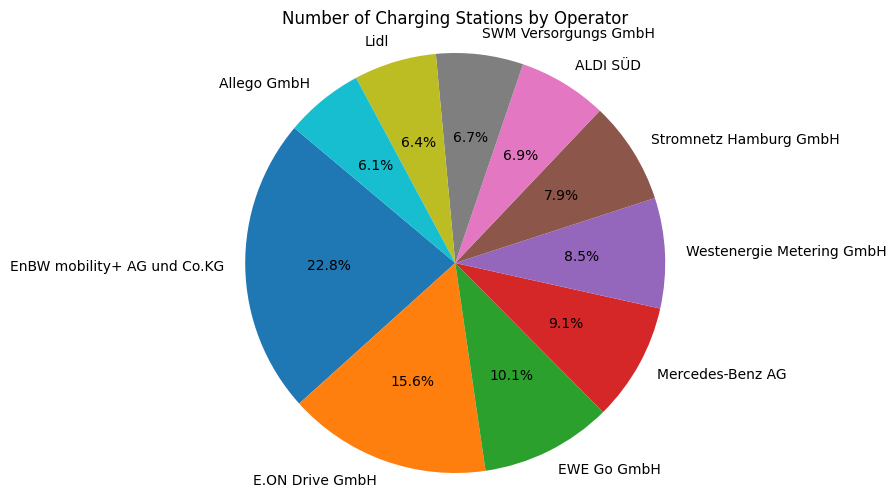

In [16]:
# Group data by 'operator' and count the number of charging stations
# operator_counts = data['operator'].value_counts().head(10)

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(
    top_operators, 
    labels=top_operators.index, 
    autopct='%1.1f%%', 
    startangle=140, 
    textprops={'fontsize': 10}
)
plt.title('Number of Charging Stations by Operator')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular
plt.show()

### 2. Average connection power by top 10 city

In [17]:
avg_power_by_city = data.groupby('city')['connection_power'].mean().sort_values(ascending=False)
print("Average connection power by city:\n", avg_power_by_city.head(10))

Average connection power by city:
 city
Schwülper                 800.0
Uttrichshausen            600.0
Laatzen/Gleidingen        360.0
Eschborn/Taunus           360.0
Enzberg-Mühlacker         360.0
Tiste                     350.0
Bad Honnef/Linz           350.0
Ferch                     350.0
Genthin/ Ot Schopsdorf    350.0
Wollin B.Brandenburg      350.0
Name: connection_power, dtype: float64


### 3. Number of charging stations by district or city

In [18]:
stations_by_district = data['district_or_city'].value_counts()
print("Number of charging stations by district or city:\n", stations_by_district)

Number of charging stations by district or city:
 district_or_city
Kreisfreie Stadt München              1410
Kreisfreie Stadt Berlin               1266
Kreisfreie Stadt Hamburg               943
Stadtkreis Stuttgart                   698
Landkreis Region Hannover              693
                                      ... 
Landkreis Birkenfeld                    13
Kreisfreie Stadt Pirmasens              13
Kreisfreie Stadt Amberg                 12
Kreisfreie Stadt Offenbach Am Main       9
Kreisfreie Stadt Schwabach               9
Name: count, Length: 400, dtype: int64


# Trend Analysis

### 1. Growth of charging stations over the years

Number of charging stations installed each year:
 commissioning_year
1992       1
2001       1
2007       2
2008       1
2009      52
2010      70
2011     198
2012     181
2013     128
2014     250
2015     520
2016    1128
2017    1883
2018    3781
2019    4809
2020    5563
2021    7867
2022    9157
2023    1178
dtype: int64


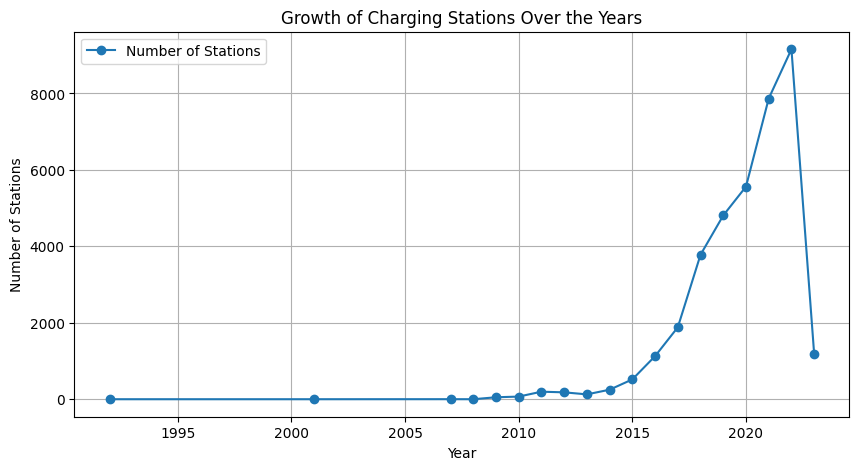

In [19]:
stations_over_time = data.groupby('commissioning_year').size()
print("Number of charging stations installed each year:\n", stations_over_time)

# Plot number of stations over time
plt.figure(figsize=(10, 5))
plt.plot(stations_over_time.index, stations_over_time.values, marker='o', label='Number of Stations')
plt.title('Growth of Charging Stations Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Stations')
plt.grid(True)
plt.legend()
plt.show()

### 2. Trend in average connection power over the years

Average connection power over the years:
 commissioning_year
1992    11.000000
2001    22.000000
2007    16.500000
2008    44.000000
2009    43.576923
2010    42.330000
2011    43.543434
2012    36.775691
2013    39.833594
2014    38.256000
2015    40.929808
2016    43.621188
2017    45.805698
2018    45.292039
2019    52.009985
2020    53.290466
2021    54.256691
2022    62.695653
2023    59.731401
Name: connection_power, dtype: float64


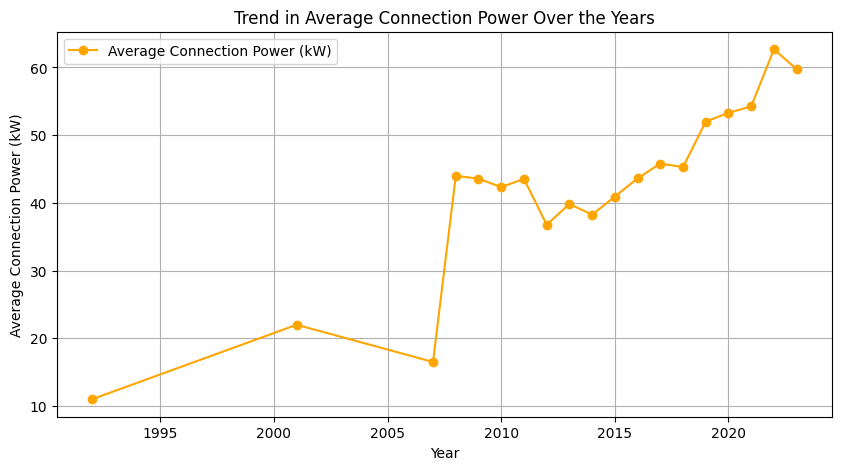

In [20]:
avg_power_over_time = data.groupby('commissioning_year')['connection_power'].mean()
print("Average connection power over the years:\n", avg_power_over_time)

# Plot average connection power over time
plt.figure(figsize=(10, 5))
plt.plot(avg_power_over_time.index, avg_power_over_time.values, marker='o', color='orange', label='Average Connection Power (kW)')
plt.title('Trend in Average Connection Power Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Connection Power (kW)')
plt.grid(True)
plt.legend()
plt.show()
